# Question 4: General Theory/Application

_No need to be verbose, it's not fun for anyone_

1. What part of S**L**A**M** did this project deal with? Why? What does the other part deal with and how would it generally work, given that you only have LIDAR scans, RGB video stream, and noisy pose data for a moving robot?


2. Loop closures play an important role in reducing drift, how would you go about detecting these?


3. Explain the structure of your Jacobian. Is the pose-graph fully connected? Why/Why not?


4. With what you know now, how would you describe and differentiate the SLAM frontend and backend? Why do we need to optimise our poses/map in the first place - where does the noise come from/why?

#### Part 1

This project dealt with the 'Localization' part of SLAM. 

This is because in pose graph SLAM, our objective is to correctly determine the poses of the mobile robot. This refers to the 'localization' in SLAM. The 'mapping' part which involves finding the correct positions of the observed points/landmarks, is not considered. There points are only used to determine the relative trasformations between the frames using odometry.

The other part 'mapping' involves finding the correct positions of the observed points/landmarks. This part would work by optimizing over both the poses and the location of the obtained points from. We would have as vertices in our graph the observed points and another edge would be added connecting the robot position with the observed points. The LIDAR scan would give the points/landmarks which are to be determined. The LIDAR scans and the RGB video feed would give an idea of the tranformation between the consecutive poses. The noisy pose data would act as an initial estimate for the initial poses.

#### Part 2

Loop closures are useful because they help add constraints which are used to make sure that the solution to the SLAM does not just stay at the initial estimate. They add new terms to the loss function and hence help us improve our localization and thus reduce drift. 

Loop closure constraints can be detected by using methods like GPS for outdoor navigation. For indoor navigation, we can estimate the loop closure using deep learning based methods from the video stream or in terms of vision based algorithms like 5-point or 8-point algorithm to estimate the closeness of the points. We could also use ICP on point clouds by LIDAR to find if the two poses are at the same position, or what the relative observation is.

#### Part 3

The Jacobian has a very specific structure due to the nature of the loss function. It consists of a pattern of diagonal lines and is sparse. There are two sections of the Jacobian, consisting of the odometry terms and the loop closure terms respectively. This is how the Jacobian looks like.

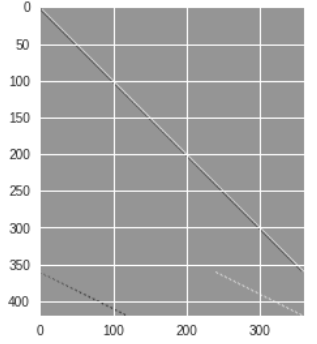

The pose graph is not fully connected. For $n$ verices or frames, there are $n-1$ odometry edges and a small number of loop closure constraints (can be assumed of order $O(n)$). Thus since a fully connected graph would have $n(n-1)/2$ edges, our pose graph will not be fully-connected in general. It might be fully connected if the robot stays at the same position in every frame, and hence we get loop closure between all the pairs of points, but this is generally not the case.

#### Part 4

The SLAM backend is mostly responsible for the optimization problem which can be inferred from the graph. This is the part that is handled by solvers such as g2o. The SLAM frontend is responsible for the creation of the SLAM graph, ie the constraints and the terms of the loss functions, basically everything leading upto the optimization problem. For eg, detection of the odometry constraints from the ICP, algorithm for finding the loop closure, etc. is a part of the frontend of SLAM.

We need to optimize the poses and maps we get from our initial estimate using odometry. This is because of two reasons - 
1. The LIDAR scans are themselves noisy due to the hardware and hence cannot be trusted 
2. The algorithms applied on the noisy sensor data are themselves not perfect. eg. ICP does not always give the correct odometry estimate. This induces even more noise in the estimates poses and maps.

Hence, due to the large amount of noise in the data obtained from the frontend, we need to optimize in the backend.